## Using Scikit-learn

🔹 Sklearn KNN Execution Time: 0.0057 sec
🔹 Accuracy: 1.00

🔹 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



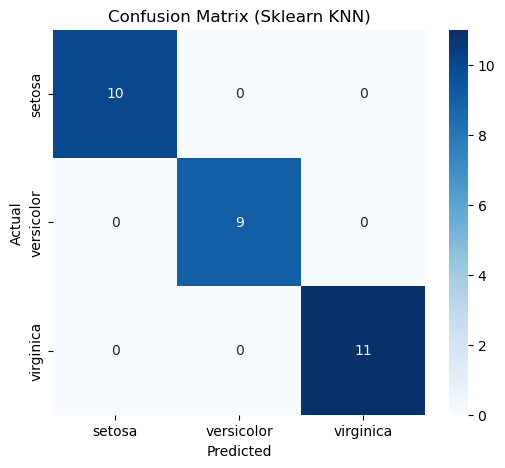

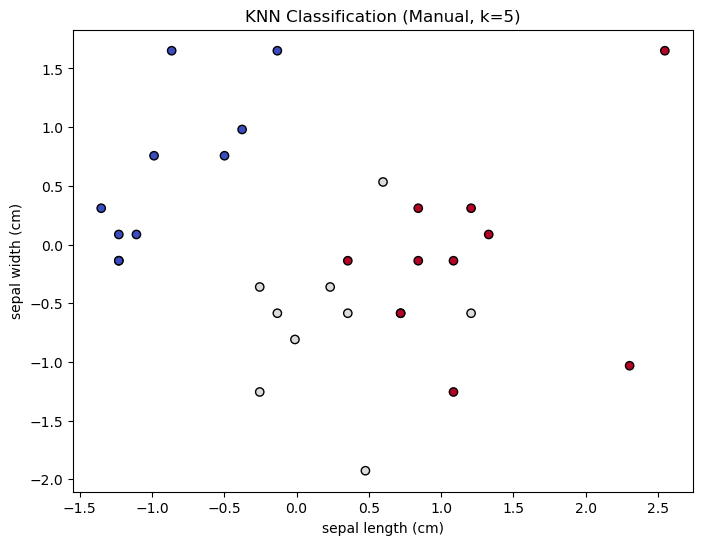

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN model
k = 5  # Number of neighbors
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
execution_time = time.time() - start_time

# Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

# Print results
print(f'🔹 Sklearn KNN Execution Time: {execution_time:.4f} sec')
print(f'🔹 Accuracy: {accuracy:.2f}\n')
print('🔹 Classification Report:\n', class_report)

# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Sklearn KNN)')
plt.show()

# Plot decision boundary (only for first 2 features)
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k', marker='o')
plt.title(f'KNN Classification (Manual, k=5)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()



## Manual implementation

🔹 Manual KNN Execution Time: 0.0461 sec
🔹 Accuracy: 1.00

🔹 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



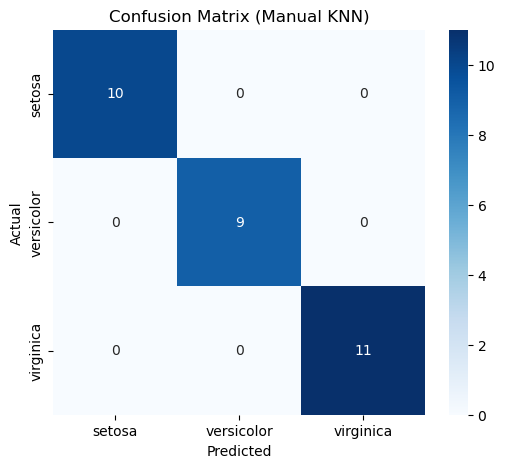

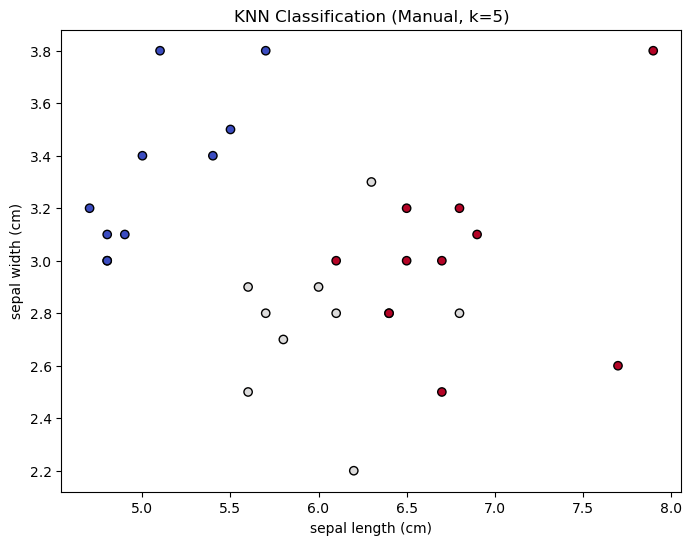

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Euclidean distance function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# KNN Classifier (Manual)
class KNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        return np.array([self._predict(x) for x in X_test])

    def _predict(self, x):
        # Compute distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Get k nearest labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model (Manual KNN)
start_time = time.time()
knn_manual = KNN(k=5)
knn_manual.fit(X_train, y_train)
y_pred_manual = knn_manual.predict(X_test)
execution_time_manual = time.time() - start_time

# Compute Metrics
accuracy_manual = accuracy_score(y_test, y_pred_manual)
conf_matrix_manual = confusion_matrix(y_test, y_pred_manual)
class_report_manual = classification_report(y_test, y_pred_manual, target_names=iris.target_names)

# Print Results
print(f'🔹 Manual KNN Execution Time: {execution_time_manual:.4f} sec')
print(f'🔹 Accuracy: {accuracy_manual:.2f}')
print('\n🔹 Classification Report:\n', class_report_manual)

# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_manual, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Manual KNN)')
plt.show()

# Plot decision boundary (only for first 2 features)
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_manual, cmap='coolwarm', edgecolors='k', marker='o')
plt.title(f'KNN Classification (Manual, k=5)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()
